In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel(r"C:\Users\Federico\Google Drive\Progetti Jupyter\Luminescenza\Dati in intrata\Tabella luminescenza.xlsx")

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Numerazione,µL inoculo,Stato,mV,Data misurazione
0,0,0,1,250,FRESCO,500,2020-07-07
1,1,1,1,250,FRESCO,337,2020-07-10
2,2,2,1,250,FRESCO,302,2020-07-10
3,3,3,1,250,FRESCO,491,2020-07-14
4,4,4,1,250,FRESCO,481,2020-07-14
...,...,...,...,...,...,...,...
103,103,107,6,1000,CONG,203,2020-07-29
104,104,108,6,1000,CONG,235,2020-07-31
105,105,109,6,1000,CONG,247,2020-07-31
106,106,110,6,1000,CONG,206,2020-08-05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        108 non-null    int64         
 1   Unnamed: 0.1      108 non-null    int64         
 2   Numerazione       108 non-null    int64         
 3   µL inoculo        108 non-null    int64         
 4   Stato             108 non-null    object        
 5   mV                108 non-null    int64         
 6   Data misurazione  108 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 6.0+ KB


In [5]:
df

,Unnamed: 0,Unnamed: 0.1,Numerazione,µL inoculo,Stato,mV,Data misurazione
0,0,0,1,250,FRESCO,500,2020-07-07
1,1,1,1,250,FRESCO,337,2020-07-10
2,2,2,1,250,FRESCO,302,2020-07-10
3,3,3,1,250,FRESCO,491,2020-07-14
4,4,4,1,250,FRESCO,481,2020-07-14
...,...,...,...,...,...,...,...
103,103,107,6,1000,CONG,203,2020-07-29
104,104,108,6,1000,CONG,235,2020-07-31
105,105,109,6,1000,CONG,247,2020-07-31
106,106,110,6,1000,CONG,206,2020-08-05


In [6]:
#Rimozione valori nulli
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df

,Unnamed: 0,Unnamed: 0.1,Numerazione,µL inoculo,Stato,mV,Data misurazione
0,0,0,1,250,FRESCO,500,2020-07-07
1,1,1,1,250,FRESCO,337,2020-07-10
2,2,2,1,250,FRESCO,302,2020-07-10
3,3,3,1,250,FRESCO,491,2020-07-14
4,4,4,1,250,FRESCO,481,2020-07-14
...,...,...,...,...,...,...,...
103,103,107,6,1000,CONG,203,2020-07-29
104,104,108,6,1000,CONG,235,2020-07-31
105,105,109,6,1000,CONG,247,2020-07-31
106,106,110,6,1000,CONG,206,2020-08-05


In [8]:
df['Numerazione'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [9]:
df

,Unnamed: 0,Unnamed: 0.1,Numerazione,µL inoculo,Stato,mV,Data misurazione
0,0,0,1,250,FRESCO,500,2020-07-07
1,1,1,1,250,FRESCO,337,2020-07-10
2,2,2,1,250,FRESCO,302,2020-07-10
3,3,3,1,250,FRESCO,491,2020-07-14
4,4,4,1,250,FRESCO,481,2020-07-14
...,...,...,...,...,...,...,...
103,103,107,6,1000,CONG,203,2020-07-29
104,104,108,6,1000,CONG,235,2020-07-31
105,105,109,6,1000,CONG,247,2020-07-31
106,106,110,6,1000,CONG,206,2020-08-05


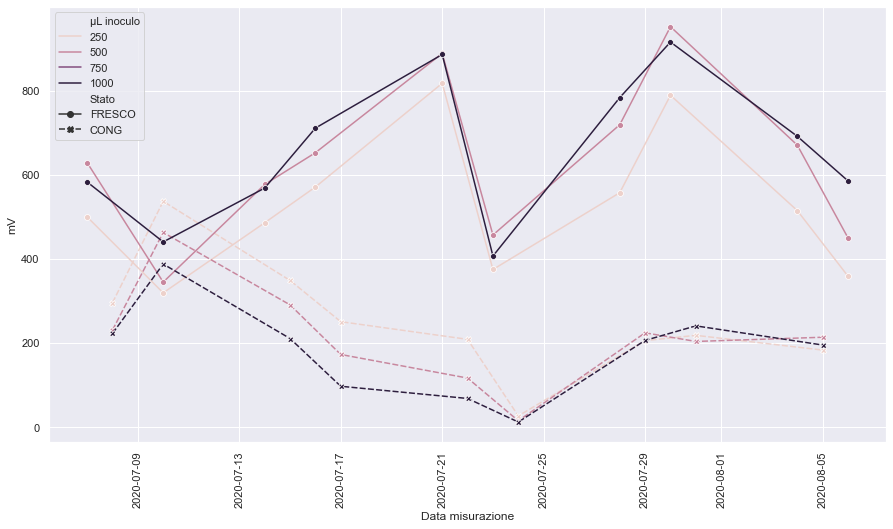

In [10]:
sns.set()
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(data=df, x="Data misurazione", y="mV", hue="µL inoculo", style= "Stato",markers=True,ci=None, )

In [11]:
#df.to_excel(r"E:\Sincronizzazione drive\Google Drive 1\Progetti Jupyter\Luminescenza\Dati in uscita\Luminescenza Pulita_grouped.xlsx")

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [50]:
y= df.Stato.values

In [51]:
X= df[["µL inoculo","mV"]]

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 100)

In [53]:
modelli=[LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]


In [54]:
for algoritmo in modelli:
    algoritmo.fit(X_train, y_train)
    pred=algoritmo.predict(X_test)
    print(accuracy_score(y_test, pred ))
    print(classification_report(y_test, pred))

0.9259259259259259
              precision    recall  f1-score   support

        CONG       0.92      0.92      0.92        13
      FRESCO       0.93      0.93      0.93        14

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.93      0.93      0.93        27

0.9629629629629629
              precision    recall  f1-score   support

        CONG       1.00      0.92      0.96        13
      FRESCO       0.93      1.00      0.97        14

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

0.8888888888888888
              precision    recall  f1-score   support

        CONG       0.86      0.92      0.89        13
      FRESCO       0.92      0.86      0.89        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg     